In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/LambdaSchool/DS-Unit-4-Sprint-1-NLP/master/module1-text-data/data/yelp_coffeeshop_review_data.csv"

shops = pd.read_csv(url)
shops.head()

,coffee_shop_name,full_review_text,star_rating
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating


In [2]:
shops['date'] = shops['full_review_text'].apply(lambda x: x.split()[0])
shops['full_review_text'] = shops['full_review_text'].apply(lambda x: " ".join(x.split()[1:]))

In [3]:
shops['rating'] = shops['star_rating'].apply(lambda x: x[:4])
del shops['star_rating']

In [4]:
shops.head()

,coffee_shop_name,full_review_text,date,rating
0,The Factory - Cafe With a Soul,1 check-in Love love loved the atmosphere! Eve...,11/25/2016,5.0
1,The Factory - Cafe With a Soul,"Listed in Date Night: Austin, Ambiance in Aust...",12/2/2016,4.0
2,The Factory - Cafe With a Soul,1 check-in Listed in Brunch Spots I loved the ...,11/30/2016,4.0
3,The Factory - Cafe With a Soul,Very cool decor! Good drinks Nice seating Howe...,11/25/2016,2.0
4,The Factory - Cafe With a Soul,1 check-in They are located within the Northcr...,12/3/2016,4.0


In [5]:
# Base
from collections import Counter
import re
 
import pandas as pd

# Plotting
import squarify
import matplotlib.pyplot as plt
import seaborn as sns

# NLP Libraries
import spacy
from spacy.tokenizer import Tokenizer

nlp = spacy.load("en_core_web_lg")
tokenizer = Tokenizer(nlp.vocab)

In [6]:
tokens = []

for doc in tokenizer.pipe(shops['full_review_text'], batch_size=500):
    doc_tokens = [token.text for token in doc]
    tokens.append(doc_tokens)
    
shops['tokens'] = tokens
shops['tokens'].head()

0    [1, check-in, Love, love, loved, the, atmosphe...
1    [Listed, in, Date, Night:, Austin,, Ambiance, ...
2    [1, check-in, Listed, in, Brunch, Spots, I, lo...
3    [Very, cool, decor!, Good, drinks, Nice, seati...
4    [1, check-in, They, are, located, within, the,...
Name: tokens, dtype: object

In [7]:
def count(docs):

        word_counts = Counter()
        appears_in = Counter()
        
        total_docs = len(docs)

        for doc in docs:
            word_counts.update(doc)
            appears_in.update(set(doc))

        temp = zip(word_counts.keys(), word_counts.values())
        
        wc = pd.DataFrame(temp, columns = ['word', 'count'])

        wc['rank'] = wc['count'].rank(method='first', ascending=False)
        total = wc['count'].sum()

        wc['pct_total'] = wc['count'].apply(lambda x: x / total)
        
        wc = wc.sort_values(by='rank')
        wc['cul_pct_total'] = wc['pct_total'].cumsum()

        t2 = zip(appears_in.keys(), appears_in.values())
        ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
        wc = ac.merge(wc, on='word')

        wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs)
        
        return wc.sort_values(by='rank')

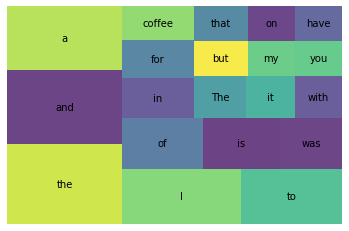

In [8]:
wc = count(shops['tokens'])
wc_20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_20['pct_total'], label=wc_20['word'], alpha=.8)
plt.axis('off')
plt.show()

In [9]:
STOP_WORDS = nlp.Defaults.stop_words.union(['Austin', 'check-in', 'coffee', 'drink', 'drinks','shop', '1', "good", "place"])

In [10]:
tokens = []

for doc in tokenizer.pipe(shops['full_review_text'], batch_size=500):
    
    doc_tokens = []
    
    for token in doc:
        if token.text not in STOP_WORDS:
            doc_tokens.append(token.text.lower())
        
    tokens.append(doc_tokens)
    
    
shops['tokens'] = tokens
shops['tokens'].head()

0    [love, love, loved, atmosphere!, every, corner...
1    [listed, date, night:, austin,, ambiance, beau...
2    [listed, brunch, spots, i, loved, eclectic, ho...
3    [very, cool, decor!, good, nice, seating, howe...
4    [they, located, northcross, mall, shopping, ce...
Name: tokens, dtype: object

In [11]:
def get_lemmas(text):
    
    lemmas = []
    
    doc = nlp(text)
    
    for token in doc:
        if ((token.is_stop == False) and (token.is_punct == False) and
           token.pos_!= 'PRON'):
            lemmas.append(token.lemma_)
            
    return lemmas

In [12]:
shops['lemmas'] = shops['full_review_text'].apply(get_lemmas)

shops['lemmas'].head()

0    [1, check, love, love, love, atmosphere, corne...
1    [list, Date, Night, Austin, Ambiance, Austin, ...
2    [1, check, Listed, Brunch, spot, love, eclecti...
3    [cool, decor, good, drink, nice, seating, over...
4    [1, check, locate, Northcross, mall, shopping,...
Name: lemmas, dtype: object

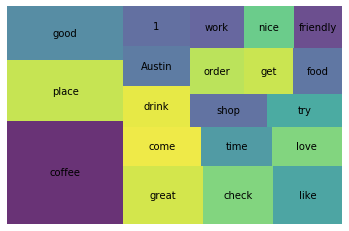

In [13]:
wc = count(shops['lemmas'])
wc_20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_20['pct_total'], label=wc_20['word'], alpha=.8)
plt.axis('off')
plt.show()

In [14]:
shops.head()

,coffee_shop_name,full_review_text,date,rating,tokens,lemmas
0,The Factory - Cafe With a Soul,1 check-in Love love loved the atmosphere! Eve...,11/25/2016,5.0,"[love, love, loved, atmosphere!, every, corner...","[1, check, love, love, love, atmosphere, corne..."
1,The Factory - Cafe With a Soul,"Listed in Date Night: Austin, Ambiance in Aust...",12/2/2016,4.0,"[listed, date, night:, austin,, ambiance, beau...","[list, Date, Night, Austin, Ambiance, Austin, ..."
2,The Factory - Cafe With a Soul,1 check-in Listed in Brunch Spots I loved the ...,11/30/2016,4.0,"[listed, brunch, spots, i, loved, eclectic, ho...","[1, check, Listed, Brunch, spot, love, eclecti..."
3,The Factory - Cafe With a Soul,Very cool decor! Good drinks Nice seating Howe...,11/25/2016,2.0,"[very, cool, decor!, good, nice, seating, howe...","[cool, decor, good, drink, nice, seating, over..."
4,The Factory - Cafe With a Soul,1 check-in They are located within the Northcr...,12/3/2016,4.0,"[they, located, northcross, mall, shopping, ce...","[1, check, locate, Northcross, mall, shopping,..."


In [15]:
shops['rating'] = shops['rating'].astype("float")

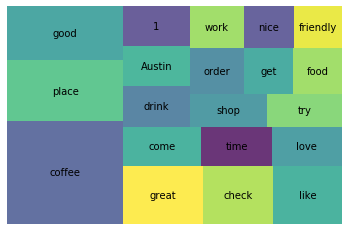

In [16]:
# Bad Coffee Shops

bad = count(shops[shops['rating'] < 4]['tokens'])

worst_20 = bad[bad['rank'] <= 20]

squarify.plot(sizes=wc_20['pct_total'], label=wc_20['word'], alpha=.8)
plt.axis('off')
plt.show()

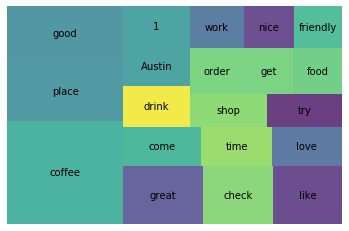

In [17]:
# Good Coffee Shops

good = count(shops[shops['rating'] > 3]['tokens'])

best_20 = good[good['rank'] <= 20]

squarify.plot(sizes=wc_20['pct_total'], label=wc_20['word'], alpha=.8)
plt.axis('off')
plt.show()

In [18]:
# Visualize words with greatest difference in counts (relatively)

bad['appears_in_pct_bad'] = bad['appears_in_pct']
diff = good[['word', 'appears_in_pct']].merge(bad[['word', 'appears_in_pct_bad']], how='outer')
diff.head()

,word,appears_in_pct,appears_in_pct_bad
0,i,0.699674,0.794715
1,the,0.509609,0.546748
2,great,0.354072,0.178862
3,it's,0.268241,0.280488
4,like,0.242020,0.371274


In [20]:
diff['diff'] = diff['appears_in_pct'] - diff['appears_in_pct_bad']
diff.sort_values(by='diff')

,word,appears_in_pct,appears_in_pct_bad,diff
4,like,0.242020,0.371274,-0.129254
20,don't,0.129153,0.230352,-0.101199
0,i,0.699674,0.794715,-0.095041
45,service,0.093974,0.176829,-0.082855
75,didn't,0.068893,0.150407,-0.081514
...,...,...,...,...
39144,offsetting,NaN,0.000678,NaN
39145,dish;,NaN,0.000678,NaN
39146,"hardened,",NaN,0.000678,NaN
39147,"""made",NaN,0.000678,NaN
